# Computational Methods in Economics

## Problem Set 4: Function Approximation - Suggested Solutions

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2018-01-12 14:18:02.253702


### Preliminaries

#### Import Modules

In [2]:
import numpy as np
import scipy.optimize

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import funapprox_cme as fa

**Note**: The last command imports the **funapprox_cme** module, which contains the functions defined in the lecture. The Python-file **funapprox_cme.py** which can be downloaded from LSF must be saved in the same folder as this notebook.

## Question 1 (N)

Construct the 5- and 50-degree approximants for the function $f(x) = \exp(-x^2)$ on the interval $[0, 2]$ using each of the following interpolation schemens:

(a) Equally spaced nodes, monomial basis

(b) Chebyshev nodes, Chebyshev basis

For each scheme and degree of approximation, plot the approximation error.

#### Answer

Start by defining the function that we want to approximate.

In [3]:
def fun(x, alpha = 1):
    """
    Exponential function
    """
    y = np.exp(-alpha * x**2)

    return y

Next, we define the grid, first for $m = 6$. We need two grids, one consisting of equally spaced nodes, one consisting of Chebyshev nodes.

In [4]:
g_min, g_max = 0, 2
m = 6

## equally spaced nodes
x_eq = np.linspace(g_min, g_max, m)
y_eq = fun(x_eq) 
## Chebyshev nodes
x_cn = fa.chebgrid(g_min, g_max, m)
y_cn = fun(x_cn)


In addition, we also define a dense grid along which we approximate the function.

In [5]:
x = np.linspace(g_min, g_max, 1001)
y = fun(x)

For question (a), the interpolation scheme involves a monomial basis, evaluated at the equally spaced nodes. We use the Numpy function **polyfit** for the interpolation step:

In [6]:
a_mono = np.polynomial.polynomial.polyfit(x_eq, y_eq, m-1)
y_mono = np.polynomial.polynomial.polyval(x, a_mono)

For question (b), we use the **chebapprox** function defined in the lecture:

In [7]:
a_cheb = fa.chebapprox(y_cn , m-1)
y_cheb = np.polynomial.chebyshev.chebval( fa.chebconvert(x, g_min, g_max), a_cheb)

Finally, we plot the true and approximated function values, as well as the absolute approximation errors. As expected, using Chebyshev nodes leads to a smaller maximum error.

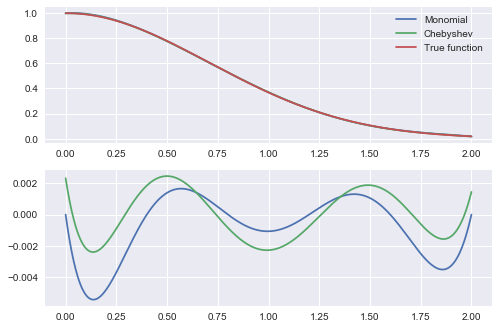

In [8]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(x, y_mono, label = 'Monomial')
ax[0].plot(x, y_cheb, label = 'Chebyshev')
ax[0].plot(x, y, label = 'True function')
ax[0].legend()
ax[1].plot(x, y - y_mono)
ax[1].plot(x, y - y_cheb)

We repeat the same steps for $m = 51$. The approximation errors are essentially zero for both schemes (since we use a high degree of approximation in both cases). Unsurprisingly given what we know about the Vandermonde matrix when using a monomial basis, we get a warning about a poorly conditioned fit.

In [9]:
m = 51

## equally spaced nodes
x_eq = np.linspace(g_min, g_max, m)
y_eq = fun(x_eq) 
## Chebyshev nodes
x_cn = fa.chebgrid(g_min, g_max, m)
y_cn = fun(x_cn)

a_mono = np.polynomial.polynomial.polyfit(x_eq, y_eq, m-1)
y_mono = np.polynomial.polynomial.polyval(x, a_mono)

a_cheb = fa.chebapprox(y_cn , m-1)
y_cheb = np.polynomial.chebyshev.chebval( fa.chebconvert(x, g_min, g_max), a_cheb)

C:\Users\schmitt\Anaconda3\lib\site-packages\numpy\polynomial\polynomial.py:1407: RankWarning: The fit may be poorly conditioned
  warnings.warn(msg, pu.RankWarning)


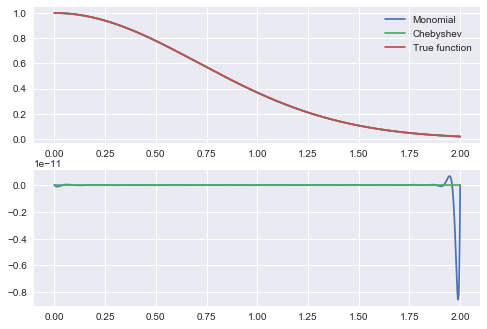

In [10]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(x, y_mono, label = 'Monomial')
ax[0].plot(x, y_cheb, label = 'Chebyshev')
ax[0].plot(x, y, label = 'True function')
ax[0].legend()
ax[1].plot(x, y - y_mono)
ax[1].plot(x, y - y_cheb)

## Question 2 (N)

This question illustrates why we should use Chebyshev nodes instead of equally spaced (equidistant) nodes. We use *Runge's function* as an example:

\begin{equation}
    f(x) = \frac{1}{1 + \alpha x^2}
\end{equation}

Approximate this function on the interval $[-5, 5]$ using all possible combinations of equally spaced/Chebyshev nodes for the interpolation grid and monomials/Chebyshev polynomials for the basis functions. What choice has a bigger impact on the approximation error?

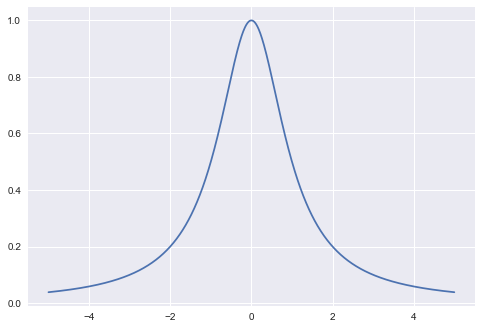

In [11]:
def fun(x, alpha = 1):
    """
    Runge's Function
    """
    return (1 + alpha * x**2)**(-1)

## dense grid
N = 1001
g_min, g_max = -5, 5
g_long = np.linspace(g_min, g_max, N)
y_long = fun(g_long)

fig, ax = plt.subplots()
ax.plot(g_long, y_long)

In [12]:
## min and max for approximation grid
g_min, g_max = -5, 5
## number of grid points
m = 11

## equally spaced nodes
g_eq = np.linspace(g_min, g_max, m)
y_eq = fun(g_eq)
## Chebyshev grid
g_cn = fa.chebgrid(g_min, g_max, m)
y_cn = fun(g_cn)

In [13]:
## store basis coefficients in dictionary for results
a = {}

## interpolation step
## monomial basis
a['m_eq'] = np.polynomial.polynomial.polyfit(g_eq, y_eq, m - 1) 
a['m_cn'] = np.polynomial.polynomial.polyfit(g_cn, y_cn, m - 1) 

## Chebyshev basis
a['ch_eq'] = np.polynomial.chebyshev.chebfit(fa.chebconvert(g_eq, g_min, g_max), y_eq, m - 1) 
a['ch_cn'] = fa.chebapprox(y_cn, m - 1) 

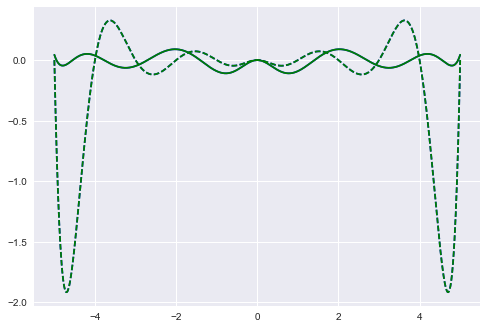

In [14]:

## plot approximation errors
fig, ax = plt.subplots()
ax.plot(g_long, y_long - np.polynomial.polynomial.polyval(g_long, a['m_eq']), 'b', linestyle = '--')
ax.plot(g_long, y_long - np.polynomial.polynomial.polyval(g_long, a['m_cn']), 'b' )
ax.plot(g_long, y_long - np.polynomial.chebyshev.chebval(fa.chebconvert(g_long, g_min, g_max), a['ch_eq']), 'g', linestyle = '--' )
ax.plot(g_long, y_long - np.polynomial.chebyshev.chebval(fa.chebconvert(g_long, g_min, g_max), a['ch_cn']), 'g' )

As we can see, what matters for the approximation error is the spacing of the grid points: equally spaced nodes lead a considerably larger interpolation error than Chebyshev nodes. The choice of the basis functions does not seem to affect the size of the interpolation error. 

## Question 3 (N)

In lecture 5, we have solved the neoclassical growth model. As a reminder, here a concise description of the model: 

- Utility function:

\begin{equation}
    u(c, h) = \frac{c^{1-\nu}}{1-\nu} - B \frac{h^{1+\eta}}{1+\eta}
\end{equation}

with $c$ denoting consumption and $h$ labor supply.

- Production function:

\begin{equation}
    f(k, h) = A k^\alpha h^{1-\alpha}
\end{equation}
with $k$ denoting the capital stock, and $A$ the productivity level.

- Resource Constraint:

\begin{equation}
    k_{t+1} + c_t = f(k_t, h_t) + (1 - \delta) k_t = A k_t^\alpha h_t^{1-\alpha} + (1 - \delta) k_t
\end{equation}

- Planner's Problem:

\begin{equation}
    \max_{\left\{c_t, k_{t+1}, h_t\right\}} \sum^\infty_{t = 0} \beta^t u(c_t, h_t) 
\end{equation}
s.t. the resource constraint.

In this question, we want to approximate the *value function* $V$, which is defined as the objective function - here lifetime utility of the representative agent - evaluated at the *optimal* sequences for capital and labor supply, $(k^*_t, h^*_t)_{t = 0}^\infty$ (and hence, via the resource constraint, optimal consumption). The value function in period 0 is a function of the initial capital stock $k_0$; in order to be feasible, any optimal sequence must satisfy $k^*_0 = k_0$:

\begin{equation}
    V(k_0) = \sum^\infty_{t = 0} \beta^t u[f(k^*_t, h^*_t) + (1 - \delta) k^*_t - k^*_{t+1}, h^*_t] = u[f(k_0, h^*_0) + (1 - \delta) k_0 - k^*_{1}, h^*_0] + \sum^\infty_{t = 1} \beta^t u[f(k^*_t, h^*_t) + (1 - \delta) k^*_t - k^*_{t+1}, h^*_t]
\end{equation}

To find $V$, implement the following steps:

(i) Create a grid for the initial capital stock $k_0$ consisting of $m$ nodes. Solve the neoclassical growth above for each of these $m$ values for $k_0$. Store the resulting values $V_i = V(k_{0, i})$ in a Numpy array.

(ii) Using the data $\{V_i, k_{0,i}\}_{i = 1}^m$, approximate the function $V$. Use both an interpolation and a regression scheme and compare the approximated values for $k_0 = 0.66$ with the true value. 


#### Answers

(i) Start by setting the parameter values and defining the usual functions, as before. Note we define the objective explicitly as a function of $k_0$.

In [15]:
## utility
beta = 0.8      # discount factor
nu = 2       # risk-aversion coefficient for consumption
eta = 1         # elasticity parameter for labor supply
eps = 1e-6      # lower bound of consumption and labor supply
## production
alpha = 0.25
delta = 0.1
## derived
A = (1 - beta * (1 - delta))/(alpha*beta) # normalization parameter for production function => steady state k = 1
B = (1 - alpha) * A * (A - delta)**(-nu)      # parameter for utility function

In [16]:
def cd(x, y):
    """
    Evaluates the Cobb-Douglas function with coefficient alpha and shift parameter A, for two inputs (x)
    """
    return A * x**alpha * y**(1 - alpha)

def u(c, h):
    """
    Utility function
    """
    return c**(1 - nu)/(1 - nu) - B * h**(1 + eta)/(1 + eta)

def objective(x, k0):
    """
    Objective function: lifetime utility
    """
    kp = np.exp( x[:int(len(x)/2)] )
    h = np.exp( x[int(len(x)/2):] )

    k = np.insert(kp[:T-1], 0, k0)
    
    return - ( beta**(np.array(range(T))) @ u( cd(k, h) + (1 - delta) * k - kp, h) 
              + (beta**T/(1 - beta)) *  u( cd(kp[-1], h[-1]) - delta * kp[-1], h[-1]) )

We set $T = 30$ (i.e. we guess that the steady state is reached after 30 periods) and solve the model once to obtain a good initial guess. 

In [17]:
T = 30

## set initial guess    
x0 = np.concatenate([np.ones(T), np.ones(T)])

## solve model
res = scipy.optimize.minimize(objective, x0, method = 'BFGS', args = (0.5), tol = 1e-6)
print(res.message)
print(res.success)
x0 = res.x

Optimization terminated successfully.
True


Next, we define a Chebyshev grid for the initial capital stock, here between 0.5 and 1.5, and use a **for** loop to solve the model for each of these grid points. The resulting value - which is stored in the **.fun** attribute of the **res** object returned by Scipy's **minimize** function, with the sign changes - is stored in a Numpy array named **V**.  

In [18]:
## construct grid for initial capital stock
g_min, g_max = 0.5, 1.5
m = 10
k_grid = fa.chebgrid(g_min, g_max, m)

V = np.zeros(m)
for (ind, item) in enumerate(k_grid):
    print(item) 
    res = scipy.optimize.minimize(objective, x0, method = 'BFGS', args = (item), tol = 1e-6)
    print(res.message)
    print(res.success)
    
    V[ind] = - res.fun
    

0.506155829702
Optimization terminated successfully.
True
0.554496737906
Optimization terminated successfully.
True
0.646446609407
Optimization terminated successfully.
True
0.77300475013
Optimization terminated successfully.
True
0.92178276748
Optimization terminated successfully.
True
1.07821723252
Optimization terminated successfully.
True
1.22699524987
Optimization terminated successfully.
True
1.35355339059
Optimization terminated successfully.
True
1.44550326209
Optimization terminated successfully.
True
1.4938441703
Optimization terminated successfully.
True


In [19]:
V

array([-5.86909628, -5.80979434, -5.70769406, -5.58472019, -5.45912617,
       -5.343252  , -5.24470706, -5.16799938, -5.11572161, -5.08927629])

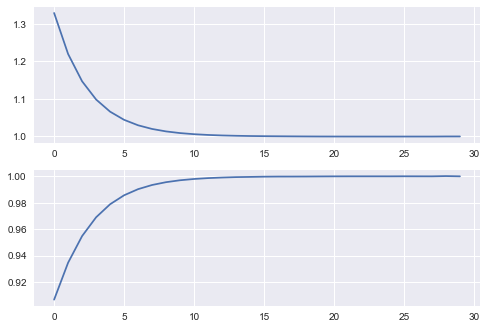

In [20]:
x = res.x
kp2 = np.exp( x[:int(len(x)/2)] )
h2 =  np.exp( x[int(len(x)/2):] )

fig, ax = plt.subplots(2,1)
ax[0].plot(kp2)
ax[1].plot(h2)

We can plot the value function to check whether it looks reasonable. Intuitively, the value of the problem should be increasing in the initial capital stock.

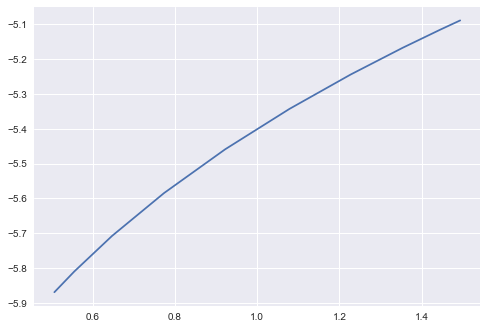

In [21]:
fig, ax = plt.subplots()
ax.plot(k_grid, V)

(ii) With the function values in **V** as data, we can use **chebapprox** to approximate the function using interpolation or regression (e.g. for a degree of approximation equal to 5): 

In [22]:
## interpolation
coef_int = fa.chebapprox(V, m - 1)
## regression
coef_reg = fa.chebapprox(V, 5)

Below, we compare the approximated values for $k_0 = 0.66$ with the true value (for which we have to solve the optimization problem again):

In [23]:
np.polynomial.chebyshev.chebval(fa.chebconvert(0.66, g_min, g_max), coef_int)

-5.6936495496695159

In [24]:
np.polynomial.chebyshev.chebval(fa.chebconvert(0.66, g_min, g_max), coef_reg)

-5.6936202295877338

In [25]:
T = 30

## set initial guess    
x0 = np.concatenate([np.ones(T), np.ones(T)])

## solve model
res = scipy.optimize.minimize(objective, x0, method = 'BFGS', args = (0.66), tol = 1e-7)
print(res.message)
print(res.success)
print(-res.fun)

Optimization terminated successfully.
True
-5.693649458353905
